In [212]:
!pip install pandas
!pip install QuantLib

In [213]:
import pandas as pd
import QuantLib as ql

from app.service.YieldCurve.NoteBooks import NotebookHelper

%matplotlib inline

In [214]:


tenor_points = NotebookHelper.build_points(NotebookHelper.sofr_swaps)

{'benchmark_points': [{'tenor': '0 day', 'rate': 0.050694339}, {'tenor': '1 week', 'rate': 0.051482818}, {'tenor': '2 week', 'rate': 0.050516581}, {'tenor': '1 month', 'rate': 0.050693418}, {'tenor': '2 month', 'rate': 0.051183173}, {'tenor': '3 month', 'rate': 0.052179246}, {'tenor': '4 month', 'rate': 0.053034023}, {'tenor': '5 month', 'rate': 0.053390716}, {'tenor': '6 month', 'rate': 0.052693244}, {'tenor': '7 month', 'rate': 0.052695327}, {'tenor': '8 month', 'rate': 0.052394946}, {'tenor': '9 month', 'rate': 0.051137664}, {'tenor': '10 month', 'rate': 0.054207728}, {'tenor': '11 month', 'rate': 0.05471223}, {'tenor': '12 month', 'rate': 0.058945942}]}


In [215]:
settings = NotebookHelper.Settings()

settings.calendar = ql.UnitedStates(ql.UnitedStates.Settlement)
#settings.index = ql.OvernightIndex("Sofr", settings.settlement_days, ql.USDCurrency(), settings.calendar, settings.day_counter)

settings.target_day = settings.today + 95
settings.compounding_type = ql.Continuous

In [216]:

raw_index_tenor = []
raw_yield = []
helpers = ql.RateHelperVector()
for point in tenor_points['benchmark_points']:
    rate = point['rate']
    tenor = NotebookHelper.get_tenor(point['tenor'])

    raw_yield.append(rate)
    raw_index_tenor.append(settings.today + tenor)

df_raw_yields = pd.DataFrame(index=raw_index_tenor, columns=['Yield'], data=raw_yield)
display(df_raw_yields)


,Yield
"June 8th, 2023",0.050694
"June 15th, 2023",0.051483
"June 22nd, 2023",0.050517
"July 8th, 2023",0.050693
"August 8th, 2023",0.051183
"September 8th, 2023",0.052179
"October 8th, 2023",0.053034
"November 8th, 2023",0.053391
"December 8th, 2023",0.052693
"January 8th, 2024",0.052695


<Axes: title={'center': 'Benchmark Rates'}, xlabel='Tenor', ylabel='Yield'>

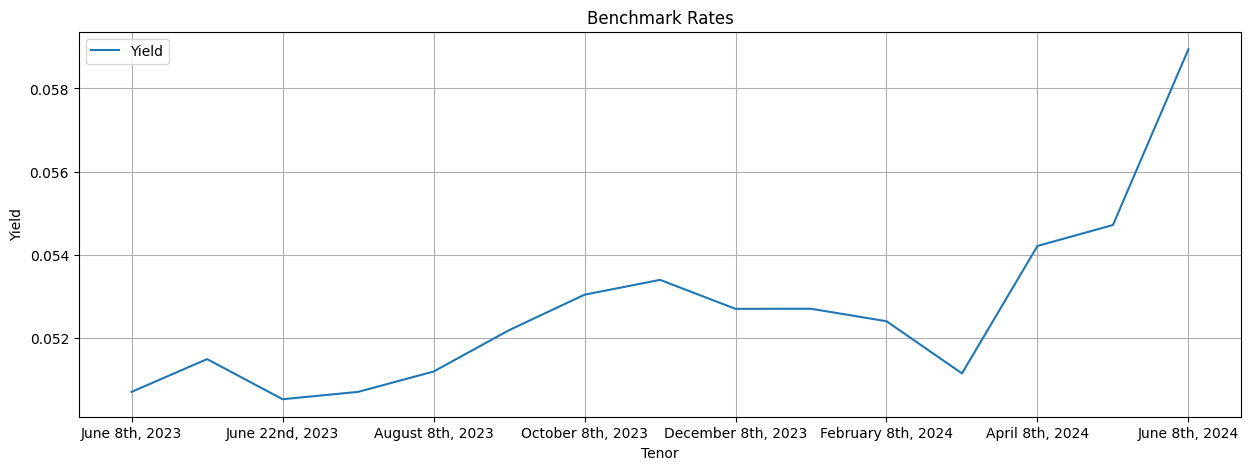

In [217]:
df_raw_yields.plot(figsize=(15,5), ylabel='Yield', xlabel='Tenor', grid=True, title='Benchmark Rates')

In [218]:
params = [raw_index_tenor, raw_yield, settings.day_counter, settings.calendar]

methods_curves = {
    "ZeroCurve": ql.ZeroCurve(*params),
    #"LogLinearZeroCurve": ql.LogLinearZeroCurve(*params),
    "CubicZeroCurve": ql.CubicZeroCurve(*params),
    "NaturalCubicZeroCurve": ql.NaturalCubicZeroCurve(*params),
    #"LogCubicZeroCurve": ql.LogCubicZeroCurve(*params),
    #"MonotonicCubicZeroCurve": ql.MonotonicCubicZeroCurve(*params)
}

df_index_tenors = pd.DataFrame(index=[row[0] for row in list(methods_curves.values())[0].nodes()])
[methods_curves[curve].enableExtrapolation() for curve in methods_curves]
end_date = list(methods_curves.values())[0].maxDate()
curve_dates = [ ql.Date(serial) for serial in range(settings.today.serialNumber(), end_date.serialNumber()+1) ]
index_curve_name = methods_curves.keys()

display(df_index_tenors)

""
"June 8th, 2023"
"June 15th, 2023"
"June 22nd, 2023"
"July 8th, 2023"
"August 8th, 2023"
"September 8th, 2023"
"October 8th, 2023"
"November 8th, 2023"
"December 8th, 2023"
"January 8th, 2024"


In [219]:
start_date = settings.today
end_date = settings.today + ql.Period(6, ql.Months)
face_amount = 1
redemption_amount = 100

zero_coupon_bond = ql.ZeroCouponBond(
                            settings.settlement_days,
                            settings.calendar,
                            face_amount,
                            end_date,
                            settings.convention,
                            redemption_amount,
                            start_date,
                        )

,yield Source,ZeroCurve,CubicZeroCurve,NaturalCubicZeroCurve
"June 8th, 2023",0.050694,0.050699,0.050701,0.050701
"June 15th, 2023",0.051483,0.051509,0.051509,0.051509
"June 22nd, 2023",0.050517,0.050566,0.050566,0.050566
"July 8th, 2023",0.050693,0.050801,0.050801,0.050801
"August 8th, 2023",0.051183,0.051406,0.051406,0.051406
"September 8th, 2023",0.052179,0.052529,0.052529,0.052529
"October 8th, 2023",0.053034,0.053513,0.053513,0.053513
"November 8th, 2023",0.053391,0.054001,0.054001,0.054001
"December 8th, 2023",0.052693,0.053405,0.053405,0.053405
"January 8th, 2024",0.052695,0.053529,0.053529,0.053529


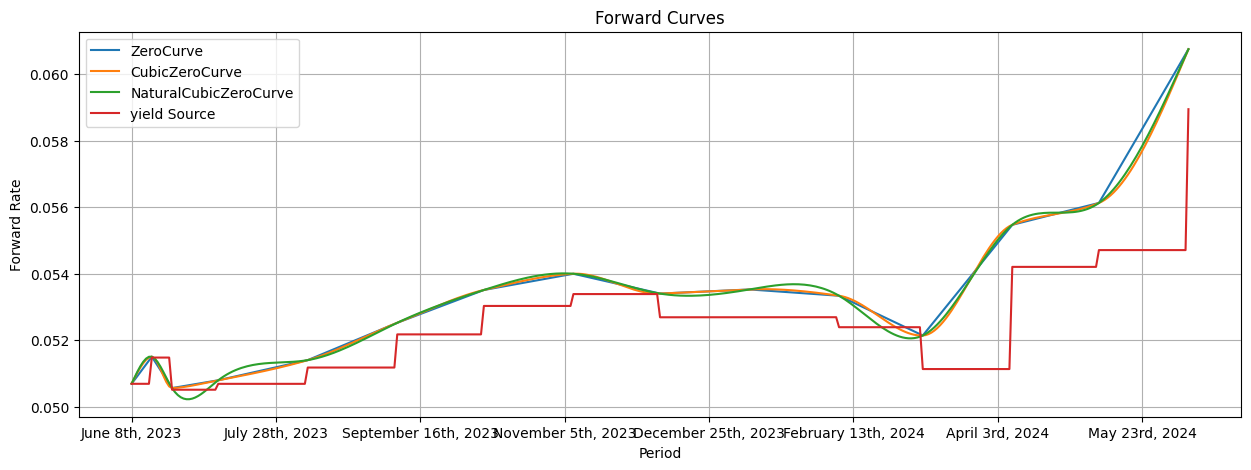

In [220]:
NotebookHelper.plot_forward_rates(curve_dates, methods_curves, settings, index_curve_name, df_raw_yields)

,yield Source,ZeroCurve,CubicZeroCurve,NaturalCubicZeroCurve
"June 8th, 2023",0.050694,0.050698,0.050700,0.050701
"June 15th, 2023",0.051483,0.051483,0.051483,0.051483
"June 22nd, 2023",0.050517,0.050517,0.050517,0.050517
"July 8th, 2023",0.050693,0.050693,0.050693,0.050693
"August 8th, 2023",0.051183,0.051183,0.051183,0.051183
"September 8th, 2023",0.052179,0.052179,0.052179,0.052179
"October 8th, 2023",0.053034,0.053034,0.053034,0.053034
"November 8th, 2023",0.053391,0.053391,0.053391,0.053391
"December 8th, 2023",0.052693,0.052693,0.052693,0.052693
"January 8th, 2024",0.052695,0.052695,0.052695,0.052695


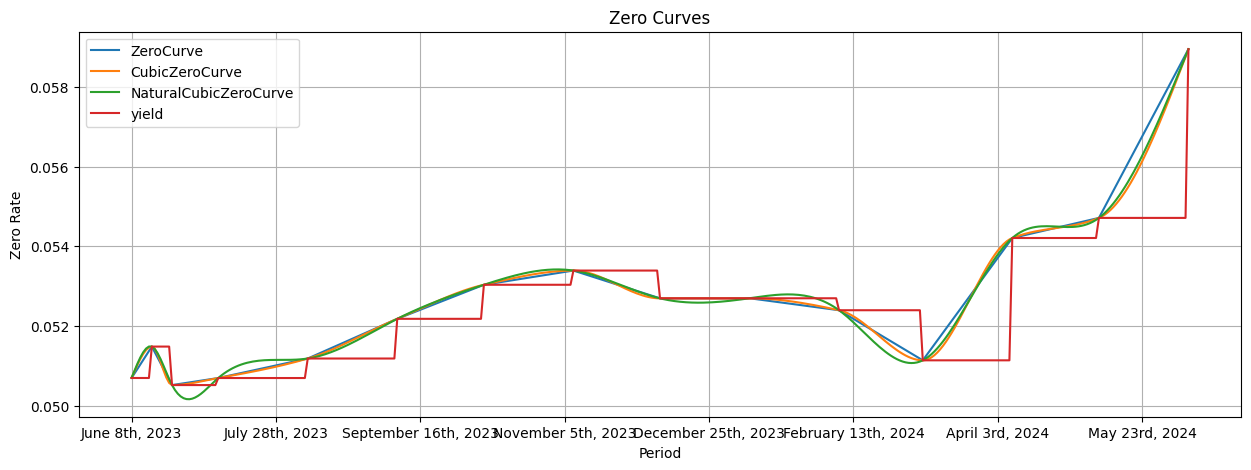

In [221]:
NotebookHelper.plot_zero_rates(curve_dates, methods_curves, settings, index_curve_name, df_raw_yields)

In [222]:
NotebookHelper.calculate_bond_from_yield_curve(methods_curves, zero_coupon_bond, settings)

,Value
Curve,ZeroCurve
CleanPrice,97.412324
DirtyPrice,97.412324
AccruedAmt,0.0
Yield,0.052728
NPV,0.97357


date: December 8th, 2023
amount: 1.0
hasOccurred: False
thisown: True


,Value
Curve,CubicZeroCurve
CleanPrice,97.412488
DirtyPrice,97.412488
AccruedAmt,0.0
Yield,0.052724
NPV,0.97357


date: December 8th, 2023
amount: 1.0
hasOccurred: False
thisown: True


,Value
Curve,NaturalCubicZeroCurve
CleanPrice,97.412533
DirtyPrice,97.412533
AccruedAmt,0.0
Yield,0.052724
NPV,0.97357


date: December 8th, 2023
amount: 1.0
hasOccurred: False
thisown: True


In [223]:
NotebookHelper.calculate_bond_from_rate(methods_curves, zero_coupon_bond, settings, start_date, end_date)

--------------------------------------------------
Rate       : 0.052693244000000077


,Value
Curve,ZeroCurve
CleanPrice,97.414
DirtyPrice,97.414
AccruedAmt,0.0
Yield,0.052693
NPV,0.97357


date: December 8th, 2023
amount: 1.0
hasOccurred: False
thisown: True
--------------------------------------------------
Rate       : 0.052693244000000077


,Value
Curve,CubicZeroCurve
CleanPrice,97.414
DirtyPrice,97.414
AccruedAmt,0.0
Yield,0.052693
NPV,0.97357


date: December 8th, 2023
amount: 1.0
hasOccurred: False
thisown: True
--------------------------------------------------
Rate       : 0.052693244000000077


,Value
Curve,NaturalCubicZeroCurve
CleanPrice,97.414
DirtyPrice,97.414
AccruedAmt,0.0
Yield,0.052693
NPV,0.97357


date: December 8th, 2023
amount: 1.0
hasOccurred: False
thisown: True
